In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp 
from scipy import optimize
import fredetry as fr
import rigtigny as rn

# Assigment model project
Ramsey model: Finding the optimal growth for a closed, neo-classic economy. The agents in this economy are identical competetive firms and a large number of identical households. This model differentiates from the Solow model where it is assumed to be a fixed savings rate, by defining the savings behavior through the intertempotal utility function of the consumer.

# Defining the model:
Please note, that all lower case variables are in per capita terms

The profit function the firms maximize: 
$$\pi^F(K_t,L_t)=K^\alpha_tL^{1-\alpha}-w_tL_t-r_tK_t$$
$0<\alpha<1$

Where: 
$K_t$ is the level of capital stock\
$L_t$ is the quantity of labor employed\
$\alpha$ is the capital's share of output\
$(1-\alpha)$ is the labor's share of output\
$w_t$ is the wage rate, cost of labor\
$r_t$ is the rental rate of capital, the cost of capital

The intertemporal utility function of the consumer subject to their dynamic budget constraint:
$$U=\sum^\infty_{t=0}\beta^t\frac{c_t^{1-\theta}}{1-\theta} \quad \text{s.t.} \quad c_t + a_{t+1} = w_t+(1+r_t)a_t \Leftrightarrow U=\sum^\infty_{t=0}\beta^t\frac{c_t^{1-\theta}}{1-\theta} \quad \text{s.t.} \quad c_t + k_{t+1} = w_t+(1+r_t)k_t$$
Assumptions: $a_0>0$, $0<\beta<1$, and due to market clearing $a_t = k_t$\
Where:
$c_t$ is the per-capita consumption\
$a_t$ is wealth\
$U$ the utility of the consumer\
$\beta$ is the discount factor, expressing the individual's preference for present consumption over future consumption\
$\theta$ is the coefficient of relative risk aversion\


Capital accumulation is given by:
$$ k_{t+1} = w_{t} + (1-r_{t})*k_{t} - c_{t]}$$
Here $r_t = r^k + \delta$, where $r^k$ refer to the price of capital and $\delta$ is the depreciation rate of capital

First we find how much capital and labor a firm demands at given factor prices by solving the firms maximization problem: 

$$\frac{\partial\pi^F(K_t,L_t)}{\partial L}=(1-\alpha)\left(\frac{K_t^\alpha}{L_t^\alpha}\right)-w_t=(1-\alpha)k^\alpha_t-w_t=0\Leftrightarrow $$ 
$$w_t=(1-\alpha)k^\alpha_t$$
The firm maximizes their labor, when the marginal products is equal to the wages, $w_t$. 
$$\frac{\partial\pi^F(K_t,L_t)}{\partial K}=\alpha\left(\frac{K_t^{\alpha-1}}{L_t^{\alpha-1}}\right)-r_t=\alpha k_t^{\alpha-1}-r_t=0\Leftrightarrow$$ 
$$ r_t=\alpha k_t^{\alpha-1}$$
The firm maximizes their capital, when the marginal products is equal to the price of capital, $r_t$. 



Using the Lagrainian we get the Euler equation, which makes the consumer indifferent between consuming one more unit today and saving the unit, thus consuming it in the future: 
$$\mathcal{L}(c_t,a_{t+1},\lambda)=\sum^\infty_{t=0}\beta^t[\frac{1}{1-\theta}c_t^{1-\theta}+\lambda_t(w_t+(1+r_t)a_t-c_t-a_{t+1})]$$
FOC w.r.t. $c_t$:
$$\frac{\partial \mathcal{L}}{\partial c_t}=\beta^t\frac{1-\theta}{1-\theta}c_t^{1-\theta-1}-\beta^t\lambda_t=0\Leftrightarrow \lambda_t = c^{-\theta}_t $$
FOC w.r.t. $a_{t+1}$:
$$\frac{\partial\mathcal{L}}{\partial a_{t+1}}=-\beta^t\lambda_t+\beta^{t+1}\lambda_{t+1}(1+r_{t+1})=0\Leftrightarrow \lambda_t = \beta(1+r_{t+1})\lambda_{t+1}$$


Combining the derivatives above give us the Euler equation: 
$$\frac{c_{t+1}}{c_t}=(\beta(1+r_{t+1}))^\frac{1}{\theta}$$
Which states that the marginal rate of substitution between the marginal utility of today and the future marginal utility is equal to the relative price of consumption. This insures equality between the future value of the discounted marginal utility of time $t+1$ and the marginal utility of time $t$. 


# Steady state equations
Following equations (loci) are the steady state values of the economy found by the above equations:\
c-locus:
$$k^*=(\frac{\beta \alpha}{1-\beta})^\frac{1}{1-\alpha}$$
We notice, that the c-locus is independent of c, meaning graphically it will be a vertical line. 
k-locus:
$$c^*=k^\alpha$$
We see, that the k-locus won't depreciate after a certain point in time. It will grow continuously. 

# Analysis 
Two countries A and B. A has certain values of the parameters alpha and beta - representing a high income country. B represents a low income country compared to A, when analysing alpha. In our analysis we will be comparing the difference between country B, when it changes its $\alpha$ and $\beta$ to the same level as country A, and which variable has the biggest effect.

# Country A ($\alpha$ = 0.4, $\beta$ = 0.9)

Firstly we set up our "rich" country, and asses it the values $\alpha$ = 0.4, $\beta$ = 0.9

In [10]:
ramsey_model = rn.Ramseymodelclass()

ramsey_model.par.alpha = 0.40
ramsey_model.par.beta = 0.90

k_star, c_star, w_star, rk_star, y_star, = ramsey_model.ss_values()

print("k_star:", k_star)
print("c_star:", c_star)
print("w_star:", w_star)
print("rk_star:", rk_star)
print("y_star:", y_star)

k_star: 8.456114104924751
c_star: 2.348920584701319
w_star: 1.4093523508207915
rk_star: 0.11111111111111108
y_star: 2.348920584701319


Then we plot the steady state for country A

Text(8.6, 0.95, 'c lokus')

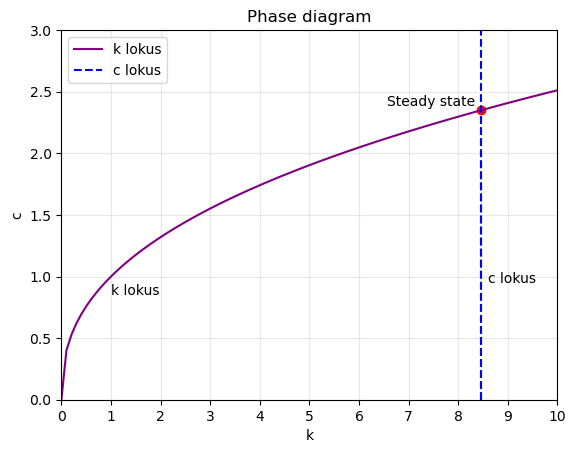

In [11]:
# Plot
k = np.linspace(0, 10, 100)
c = fr.c_lokus(fr.params["model1"]["alpha"], fr.params["model1"]["beta"])
fig, ax = plt.subplots()
ax.plot(k, fr.k_lokus(k, fr.params["model1"]["alpha"]), color="purple", label="k lokus")
ax.plot([c, c], [fr.k_lokus(0, fr.params["model1"]["alpha"]), fr.k_lokus(c, fr.params["model1"]["alpha"])], "--", color="blue", label="c lokus")
ax.axvline(x=fr.ss[0], color="blue", linestyle="--", alpha=1)
ax.scatter(fr.ss[0], fr.ss[1], marker="o", color="red")
ax.set_xlabel("k")
ax.set_ylabel("c")
ax.set_title("Phase diagram")
ax.legend()

# Set axis limits and tick positions
ax.set_xlim([0, 10])  # Set x-axis limits from 0 to 0.5
ax.set_xticks(np.arange(0, 11, 1))  # Adjust x-axis tick positions
ax.set_ylim([0, 3])  
ax.set_yticks(np.arange(0, 3.5, 0.5))
ax.grid(alpha=0.3)

# Add text labels
ax.text(fr.ss[0]-1.9, fr.ss[1]+0.04, "Steady state")
ax.text(1.0, 0.85, "k lokus")
ax.text(8.6, 0.95, "c lokus")


Next we plot the Capital over time.

Text(0.5, 1.0, 'Time Path of Capital')

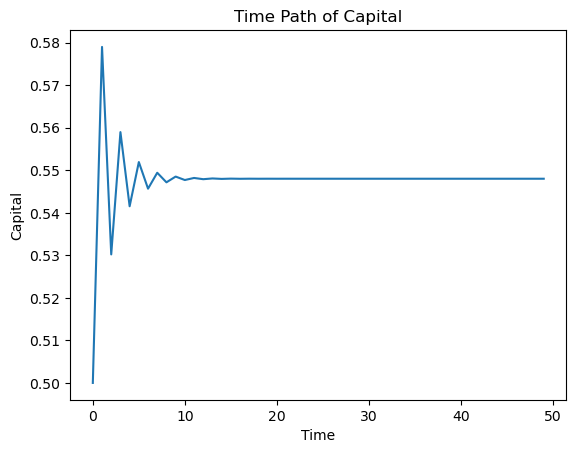

In [32]:
ramsey_model = rn.Ramseymodelclass()

ramsey_model.par.alpha = 0.40
ramsey_model.par.beta = 0.90


k0 = 0.5


k_path = [k0]


for t in range(1, 50):
    # Use the Euler equation to compute the optimal capital choice
    k_opt = ramsey_model.par.beta * ramsey_model.par.alpha * k_path[t-1] ** (ramsey_model.par.alpha - 1) * (ramsey_model.ss_values()[3] + 1 - ramsey_model.par.delta)
    k_path.append(k_opt)

# Plot the time path of k
fig, ax = plt.subplots()
ax.plot(range(50), k_path)
ax.set_xlabel("Time")
ax.set_ylabel("Capital")
ax.set_title("Time Path of Capital")


# Country B1 ($\alpha$ = 0.2, $\beta$ = 0.9)

Now we analyse country B, where we have the same $\beta$ values as country A, but different $\alpha$ values

In [42]:
ramsey_model = rn.Ramseymodelclass()

ramsey_model.par.alpha = 0.20
ramsey_model.par.beta = 0.90

k_star, c_star, w_star, rk_star, y_star = ramsey_model.ss_values()

print("k_star:", k_star)
print("c_star:", c_star)
print("w_star:", w_star)
print("rk_star:", rk_star)
print("y_star:", y_star)


k_star: 2.0849259335188854
c_star: 1.1582921852882693
w_star: 0.9266337482306155
rk_star: 0.11111111111111105
y_star: 1.1582921852882693


Then we compute the steady state

Text(2.15, 0.2, 'c lokus')

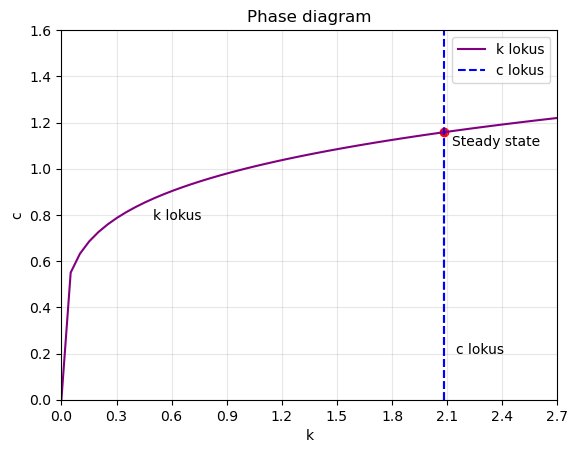

In [43]:
# Plot
kB1 = np.linspace(0, 5, 100)
cB1 = fr.c_lokusB1(fr.paramsB1["modelB1"]["alphaB1"], fr.paramsB1["modelB1"]["betaB1"])
fig, ax = plt.subplots()
ax.plot(kB1, fr.k_lokusB1(kB1, fr.paramsB1["modelB1"]["alphaB1"]), color="purple", label="k lokus")
ax.plot([cB1, cB1], [fr.k_lokusB1(0, fr.paramsB1["modelB1"]["alphaB1"]), fr.k_lokusB1(cB1, fr.paramsB1["modelB1"]["alphaB1"])], "--", color="blue", label="c lokus")
ax.axvline(x=fr.ssB1[0], color="blue", linestyle="--", alpha=1)
ax.scatter(fr.ssB1[0], fr.ssB1[1], marker="o", color="red")
ax.set_xlabel("k")
ax.set_ylabel("c")
ax.set_title("Phase diagram")
ax.legend()

# Set axis limits and tick positions
ax.set_xlim([0, 2.7])  # Set x-axis limits from 0 to 0.5
ax.set_xticks(np.arange(0, 3.0, 0.3))  # Adjust x-axis tick positions
ax.set_ylim([0, 1.6])  
ax.set_yticks(np.arange(0, 1.7, 0.2))
ax.grid(alpha=0.3)

# Add text labels
ax.text(fr.ssB1[0]+0.04, fr.ssB1[1]-0.06, "Steady state")
ax.text(0.5, 0.78, "k lokus")
ax.text(2.15, 0.2, "c lokus")

And then we compute the capital over time

Text(0.5, 1.0, 'Time Path of Capital')

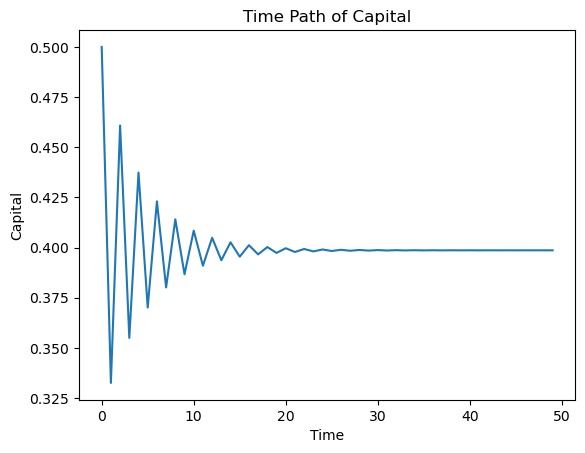

In [46]:
ramsey_model = rn.Ramseymodelclass()

ramsey_model.par.alpha = 0.20
ramsey_model.par.beta = 0.90

k0 = 0.5

k_path = [k0]

for t in range(1, 50):
    # Use the Euler equation to compute the optimal capital choice
    k_opt = ramsey_model.par.beta * ramsey_model.par.alpha * k_path[t-1] ** (ramsey_model.par.alpha - 1) * (ramsey_model.ss_values()[3] + 1 - ramsey_model.par.delta)
    k_path.append(k_opt)

# Plot the time path of k
fig, ax = plt.subplots()
ax.plot(range(50), k_path)
ax.set_xlabel("Time")
ax.set_ylabel("Capital")
ax.set_title("Time Path of Capital")

# Country B2 ($\alpha$ = 0.4, $\beta$ = 0.5)

Then we find the steady state for country B, where we now have the same $\alpha$ values as country A, but different $\beta$ values.

In [16]:
ramsey_model = rn.Ramseymodelclass()

ramsey_model.par.alpha = 0.40
ramsey_model.par.beta = 0.50

k_star, c_star, w_star, rk_star, y_star = ramsey_model.ss_values()

print("k_star:", k_star)
print("c_star:", c_star)
print("w_star:", w_star)
print("rk_star:", rk_star)
print("y_star:", y_star)


k_star: 0.21715340932759253
c_star: 0.5428835233189813
w_star: 0.32573011399138874
rk_star: 1.0
y_star: 0.5428835233189813


Text(0.22, 0.2, 'c lokus')

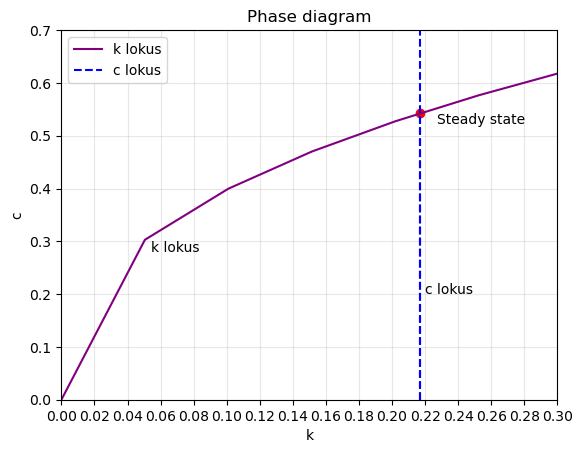

In [41]:
# Plot
kB2 = np.linspace(0, 5, 100)
cB2 = fr.c_lokusB2(fr.paramsB2["modelB2"]["alphaB2"], fr.paramsB2["modelB2"]["betaB2"])
fig, ax = plt.subplots()
ax.plot(kB2, fr.k_lokusB2(kB2, fr.paramsB2["modelB2"]["alphaB2"]), color="purple", label="k lokus")
ax.plot([cB2, cB2], [fr.k_lokusB2(0, fr.paramsB2["modelB2"]["alphaB2"]), fr.k_lokusB2(cB2, fr.paramsB2["modelB2"]["alphaB2"])], "--", color="blue", label="c lokus")
ax.axvline(x=fr.ssB2[0], color="blue", linestyle="--", alpha=1)
ax.scatter(fr.ssB2[0], fr.ssB2[1], marker="o", color="red")
ax.set_xlabel("k")
ax.set_ylabel("c")
ax.set_title("Phase diagram")
ax.legend()

# Set axis limits and tick positions
ax.set_xlim([0, 0.3])  # Set x-axis limits from 0 to 0.5
ax.set_xticks(np.arange(0, 0.32, 0.02))  # Adjust x-axis tick positions
ax.set_ylim([0, 0.7])
ax.set_yticks(np.arange(0, 0.8, 0.1))
ax.grid(alpha=0.3)

# Add text labels
ax.text(fr.ssB2[0]+0.01, fr.ssB2[1]-0.02, "Steady state")
ax.text(0.054, 0.28, "k lokus")
ax.text(0.22, 0.2, "c lokus")


Text(0.5, 1.0, 'Time Path of Capital')

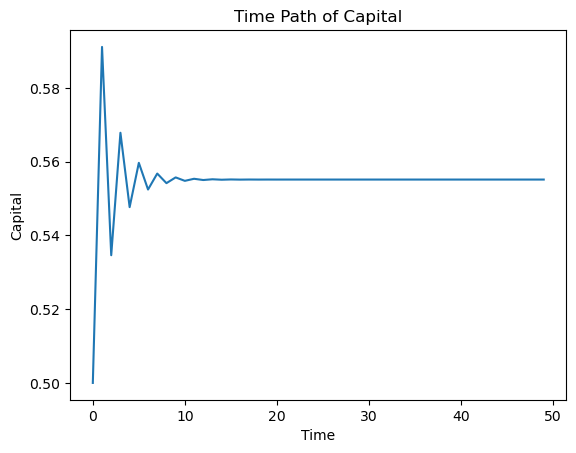

In [33]:
ramsey_model = rn.Ramseymodelclass()

ramsey_model.par.alpha = 0.40
ramsey_model.par.beta = 0.50


k0 = 0.5


k_path = [k0]


for t in range(1, 50):
    # Use the Euler equation to compute the optimal capital choice
    k_opt = ramsey_model.par.beta * ramsey_model.par.alpha * k_path[t-1] ** (ramsey_model.par.alpha - 1) * (ramsey_model.ss_values()[3] + 1 - ramsey_model.par.delta)
    k_path.append(k_opt)

# Plot the time path of k
fig, ax = plt.subplots()
ax.plot(range(50), k_path)
ax.set_xlabel("Time")
ax.set_ylabel("Capital")
ax.set_title("Time Path of Capital")

Then we compare the steady states, and capital over time from the two countries, and compare the effect of $\alpha$ and $\beta$ on the economies.

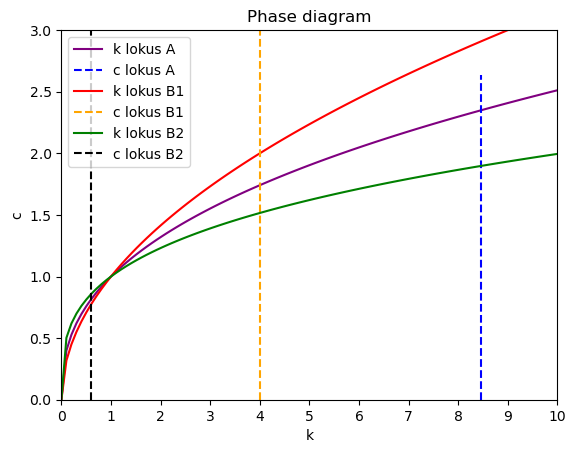

In [57]:
class Ramseymodelclass:
    def __init__(self):
        self.par = {
            "model1": {"alpha": 0.4, "beta": 0.9},
            "modelB1": {"alphaB1": 0.5, "betaB1": 0.8},
            "modelB2": {"alphaB2": 0.3, "betaB2": 0.7}
        }
        self.ss = (1, 1)
        self.ssB1 = (0.5, 0.5)
        self.ssB2 = (0.2, 0.1)

    @staticmethod
    def k_lokus(k, alpha):
        return k ** alpha

    def c_lokus(self, alpha, beta):
        return ((beta * alpha) / (1 - beta)) ** (1 / (1 - alpha))

    def c_lokusB1(self, alphaB1, betaB1):
        return ((betaB1 * alphaB1) / (1 - betaB1)) ** (1 / (1 - alphaB1))

    def c_lokusB2(self, alphaB2, betaB2):
        return ((betaB2 * alphaB2) / (1 - betaB2)) ** (1 / (1 - alphaB2))

ramsey_model = Ramseymodelclass()

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot for model 1
k = np.linspace(0, 10, 100)
c = ramsey_model.c_lokus(ramsey_model.par["model1"]["alpha"], ramsey_model.par["model1"]["beta"])
ax.plot(k, ramsey_model.k_lokus(k, ramsey_model.par["model1"]["alpha"]), color="purple", label="k lokus A")
ax.plot([c, c], [0, ax.get_ylim()[1]], "--", color="blue", label="c lokus A")

# Plot for model B1
kB1 = np.linspace(0, 10, 100)
cB1 = ramsey_model.c_lokusB1(ramsey_model.par["modelB1"]["alphaB1"], ramsey_model.par["modelB1"]["betaB1"])
ax.plot(kB1, ramsey_model.k_lokus(kB1, ramsey_model.par["modelB1"]["alphaB1"]), color="red", label="k lokus B1")
ax.plot([cB1, cB1], [0, ax.get_ylim()[1]], "--", color="orange", label="c lokus B1")

# Plot for model B2
kB2 = np.linspace(0, 10, 100)
cB2 = ramsey_model.c_lokusB2(ramsey_model.par["modelB2"]["alphaB2"], ramsey_model.par["modelB2"]["betaB2"])
ax.plot(kB2, ramsey_model.k_lokus(kB2, ramsey_model.par["modelB2"]["alphaB2"]), color="green", label="k lokus B2")
ax.plot([cB2, cB2], [0, ax.get_ylim()[1]], "--", color="black", label="c lokus B2")


# Set axis labels and title
ax.set_xlabel("k")
ax.set_ylabel("c")
ax.set_title("Phase diagram")

# Set axis limits and tick positions
ax.set_xlim([0, 10])
ax.set_ylim([0, 3])
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 3.5, 0.5))

# Add legend
ax.legend()

# Display the plot
plt.show()


    Country A  Country B1  Country B2
0    0.300000    0.300000    0.300000
1    0.786666    0.500422    0.803141
2    0.441153    0.332326    0.444825
3    0.624180    0.461086    0.634090
4    0.506848    0.354820    0.512595
5    0.574298    0.437549    0.582372
6    0.532821    0.370008    0.539442
7    0.557333    0.423120    0.564804
8    0.542494    0.380069    0.549447
9    0.551349    0.414137    0.558610
10   0.546019    0.386650    0.553094
11   0.549211    0.408487    0.556397
12   0.547293    0.390922    0.554413
13   0.548443    0.404912    0.555603
14   0.547753    0.393681    0.554889
15   0.548167    0.402641    0.555317
16   0.547918    0.395457    0.555060
17   0.548067    0.401194    0.555214
18   0.547978    0.396598    0.555122
19   0.548032    0.400270    0.555177
20   0.547999    0.397329    0.555144
21   0.548019    0.399680    0.555164
22   0.548007    0.397799    0.555152
23   0.548014    0.399303    0.555159
24   0.548010    0.398099    0.555155
25   0.54801

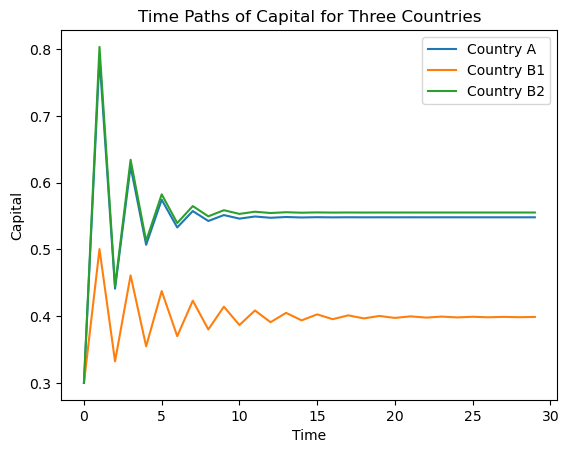

In [59]:
# Compute the time paths of k for three countries
k_paths = {}
countries = ['Country A', 'Country B1', 'Country B2']
for country in countries:
    ramsey_model = rn.Ramseymodelclass()
    # Set the parameter values for the country
    if country == 'Country A':
        ramsey_model.par.alpha = 0.40
        ramsey_model.par.beta = 0.90
        k0 = 0.3
    elif country == 'Country B1':
        ramsey_model.par.alpha = 0.20
        ramsey_model.par.beta = 0.90
        k0 = 0.3
    elif country == 'Country B2':
        ramsey_model.par.alpha = 0.40
        ramsey_model.par.beta = 0.50
        k0 = 0.3
    # Compute the time path of k for the country
    k_path = [k0]
    for t in range(1, 30):
        k_opt = ramsey_model.par.beta * ramsey_model.par.alpha * k_path[t-1] ** (ramsey_model.par.alpha - 1) * (ramsey_model.ss_values()[3] + 1 - ramsey_model.par.delta)
        k_path.append(k_opt)
    k_paths[country] = k_path

# Create a pandas DataFrame to store the time paths of k for the three countries
df = pd.DataFrame(k_paths)

# Display the DataFrame
print(df)

fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Capital")
ax.set_title("Time Paths of Capital for Three Countries")
plt.show()


In our example we are looking at two countries, country A, and country B. Country A has an $\alpha$ of 0.4 and a $\beta$ of 0.9. Country B has two states, one where the $\alpha$ is different from country A, B1 where $\alpha$ of 0.2 and a $\beta$ of 0.9, and one where the $\beta$ is different, $\alpha$ of 0.4 and a $\beta$ of 0.5.

$\alpha$ is used to shows the elasticity of output within an economy. This represents how efficient an economy is to generate output from their given capital. A higher $\alpha$ therefore indicates that the capital within the economy is more efficient. 

$\beta$ is used to show the discount factor within an economy. This indicates the rate at which future consumption is valued compared to current consumption. If the $\beta$ value is higher, it will mean that future consumption is valued higher than current consumption and vice versa. Therefore the higher the $\beta$ the more inclined households are to smoothing their consumption over time.

Looking at the graphs above we can see that the Ramsey model predicts that the higher level of $\alpha$ led to a higher level of steady state over time. As the can be observed, B1 converged at 0.398, while B2 converged at 0.555.

In general, the steady-state level of capital is the level at which the economy's investment in new capital is equal to the rate of depreciation of existing capital. At the steady state, the economy is in a long-run equilibrium in which the capital stock is neither increasing nor decreasing.

# Conclusion

Using the model that we have set up we can see that a higher value of $\alpha$ contributes greater to the capital over time for a country. Therefore in this example, we would prioritse $\alpha$, as it would have the highest long-run steady state. When running the simulation with actual economies, there might be a different result given the difference in capital tools. 